In [424]:
from google.colab import files
uploaded = files.upload()

Saving train_v9rqX0R.csv to train_v9rqX0R (5).csv


In [425]:
from google.colab import files
uploaded = files.upload()

Saving test_AbJTz2l.csv to test_AbJTz2l (5).csv


In [426]:
import io
import pandas as pd
df=pd.read_csv(r'train_v9rqX0R.csv')

In [427]:
import io
import pandas as pd
df1=pd.read_csv(r'test_AbJTz2l.csv')

## **Sales Prediction for Big Mart Outlets**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## **Importing Libraries**

In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Shape of train and test datasets**

In [429]:
df.shape,df1.shape

((8523, 12), (5681, 11))

In [430]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [431]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## **How does the data look mathematically**

In [432]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [433]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## **Data type of columns**

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Cleaning the Data**

In [436]:
df=df.drop('Item_Identifier',axis=1)
df1=df1.drop('Item_Identifier',axis=1)
df=df.drop('Outlet_Identifier',axis=1)
df1=df1.drop('Outlet_Identifier',axis=1)
df=df.drop('Outlet_Establishment_Year',axis=1)

In [437]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [438]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


## **Missing Values**

In [439]:
df.isnull().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [440]:
df1.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [441]:
df.isnull().mean()*100

Item_Weight             17.165317
Item_Fat_Content         0.000000
Item_Visibility          0.000000
Item_Type                0.000000
Item_MRP                 0.000000
Outlet_Size             28.276428
Outlet_Location_Type     0.000000
Outlet_Type              0.000000
Item_Outlet_Sales        0.000000
dtype: float64

In [442]:
df1.isnull().mean()*100

Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

<Axes: >

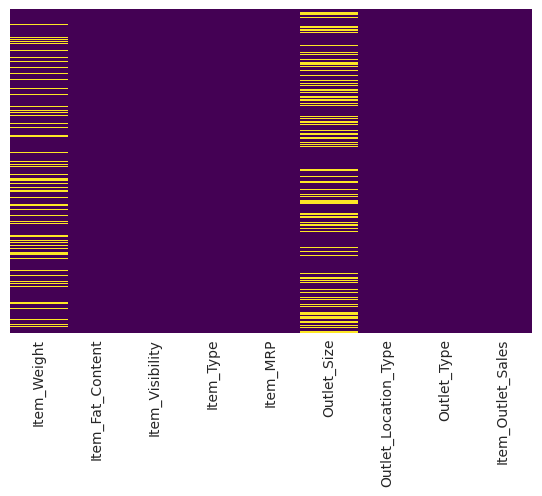

In [443]:
## Plotting Missing Values on Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

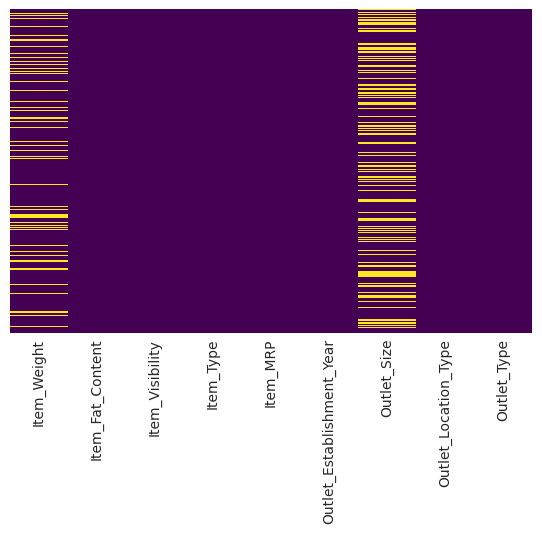

In [444]:
plt.figure(figsize=(6,4))
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## **Missing Value Imputation**

In [445]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [446]:
df1['Item_Weight'].unique()

array([20.75 ,  8.3  , 14.6  ,  7.315,    nan,  9.8  , 19.35 ,  6.305,
        5.985, 16.6  ,  6.59 ,  4.785, 16.75 ,  6.135, 19.85 , 17.85 ,
       13.6  ,  7.1  , 19.2  , 13.65 ,  6.785, 13.   ,  5.825, 13.8  ,
       12.8  ,  9.5  , 12.5  ,  5.78 , 10.395, 18.35 , 21.1  , 19.75 ,
        8.43 , 15.35 ,  6.71 , 10.195, 11.65 , 12.85 , 12.15 , 18.25 ,
        5.98 , 12.65 , 13.1  , 20.7  ,  7.855, 13.35 , 17.25 ,  8.315,
       21.35 ,  5.88 ,  7.435, 14.65 , 14.   , 18.2  , 17.6  ,  7.71 ,
        7.81 , 16.35 , 16.1  ,  5.34 ,  5.51 ,  6.61 ,  6.38 ,  8.71 ,
       17.75 ,  6.44 , 12.6  ,  7.935, 18.5  ,  6.035, 11.8  ,  6.26 ,
       16.5  , 15.7  ,  6.635,  8.155,  6.175,  8.18 ,  8.355,  6.905,
       20.35 , 19.25 ,  5.48 ,  5.425, 12.1  , 11.   ,  5.765,  5.44 ,
        6.13 ,  8.195, 14.15 , 14.3  ,  5.635,  5.73 ,  7.155, 15.2  ,
       15.25 ,  8.76 ,  9.13 , 19.6  , 10.   , 11.3  ,  6.57 , 13.15 ,
        4.635, 10.6  ,  9.3  ,  7.02 ,  7.825, 19.1  ,  7.51 ,  8.85 ,
      

In [447]:
df['Item_Weight'].mean()

12.857645184135976

In [448]:
df1['Item_Weight'].mean()

12.695633368756642

In [449]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df.isnull().sum()

Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [450]:
df1['Item_Weight']=df1['Item_Weight'].fillna(df1['Item_Weight'].mean())
df1.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [451]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [452]:
df1['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [453]:
df['Outlet_Size'].mode()[0]

'Medium'

In [454]:
df1['Outlet_Size'].mode()[0]

'Medium'

In [455]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [456]:
df1['Outlet_Size']=df1['Outlet_Size'].fillna(df1['Outlet_Size'].mode()[0])
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


In [457]:
df.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [458]:
df1.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**Categorical Features:**

Item_Fat_Content

Item_Type

Outlet_Size

Outlet_Location_Type

Outlet_Type

## **Feature Encoding**

In [459]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [460]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [461]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [462]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

In [463]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052


## **Feature Scaling**

In [464]:
feature_scale=[feature for feature in df.columns if feature not in ["Item_Identifier","Outlet_Identifier"]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df[feature_scale])

StandardScaler()

## **Feature Selection**

In [465]:
##for feature selection
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [466]:
## Splitting Train and Test data
x_train=df.drop(['Item_Outlet_Sales'],axis=1)
y_train=df['Item_Outlet_Sales']

In [467]:
feature_sel_model = SelectFromModel(Ridge(alpha=0.1, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Ridge(alpha=0.1, random_state=0))

In [468]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 8
selected features: 3
features with coefficients shrank to zero: 0


In [469]:
x_train=x_train[selected_feat]

## **Observation**

In [470]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import missingno as msno


<ipython-input-471-cdbc4950f97b>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)


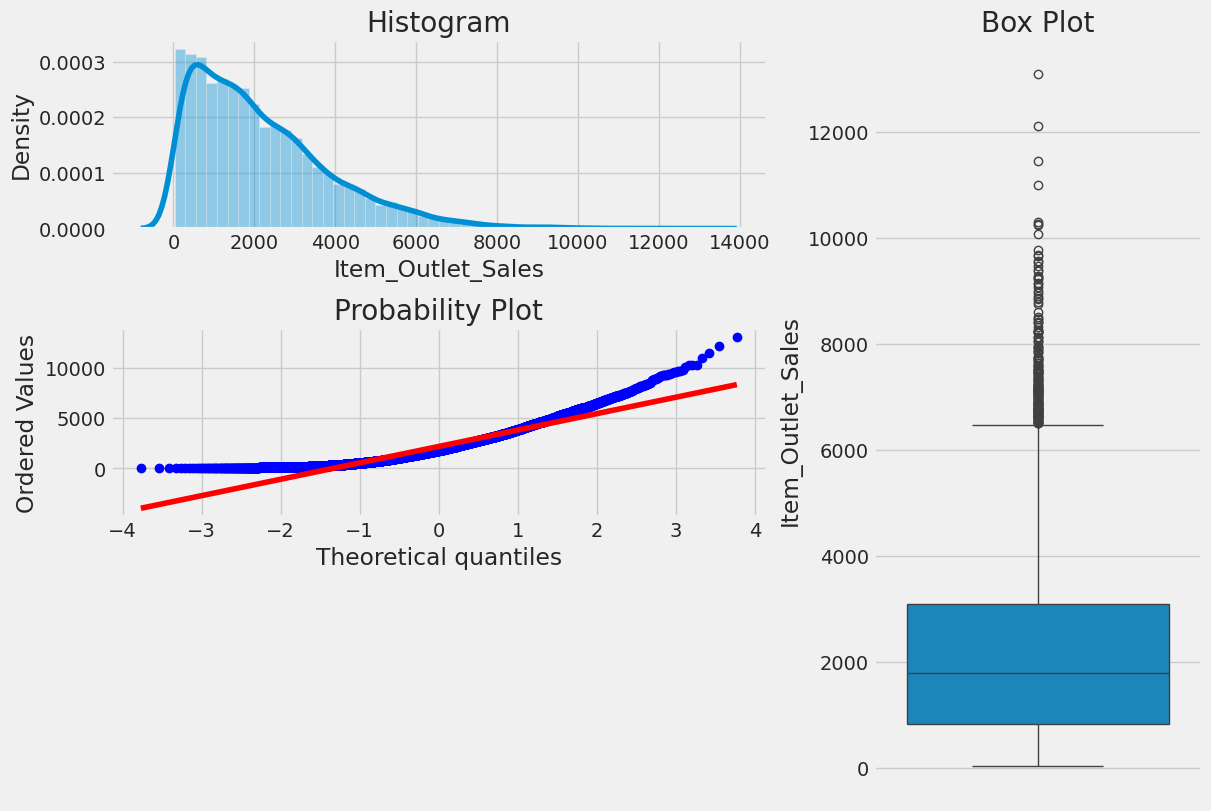

In [471]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules.
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title.
    ax1.set_title('Histogram')
    ## plot the histogram.
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title.
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot.
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    ## Plotting the box plot.
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );

plotting_3_chart(df, 'Item_Outlet_Sales')

In [472]:
df["Item_Outlet_Sales"].skew()

1.1775306028542796

In [473]:
(df.corr()**2)["Item_Outlet_Sales"].sort_values(ascending=False)[1:]

Item_MRP                0.322141
Outlet_Type             0.161220
Item_Visibility         0.016544
Outlet_Location_Type    0.007986
Outlet_Size             0.007427
Item_Fat_Content        0.000350
Item_Type               0.000291
Item_Weight             0.000133
Name: Item_Outlet_Sales, dtype: float64

<ipython-input-474-56e87bb02186>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


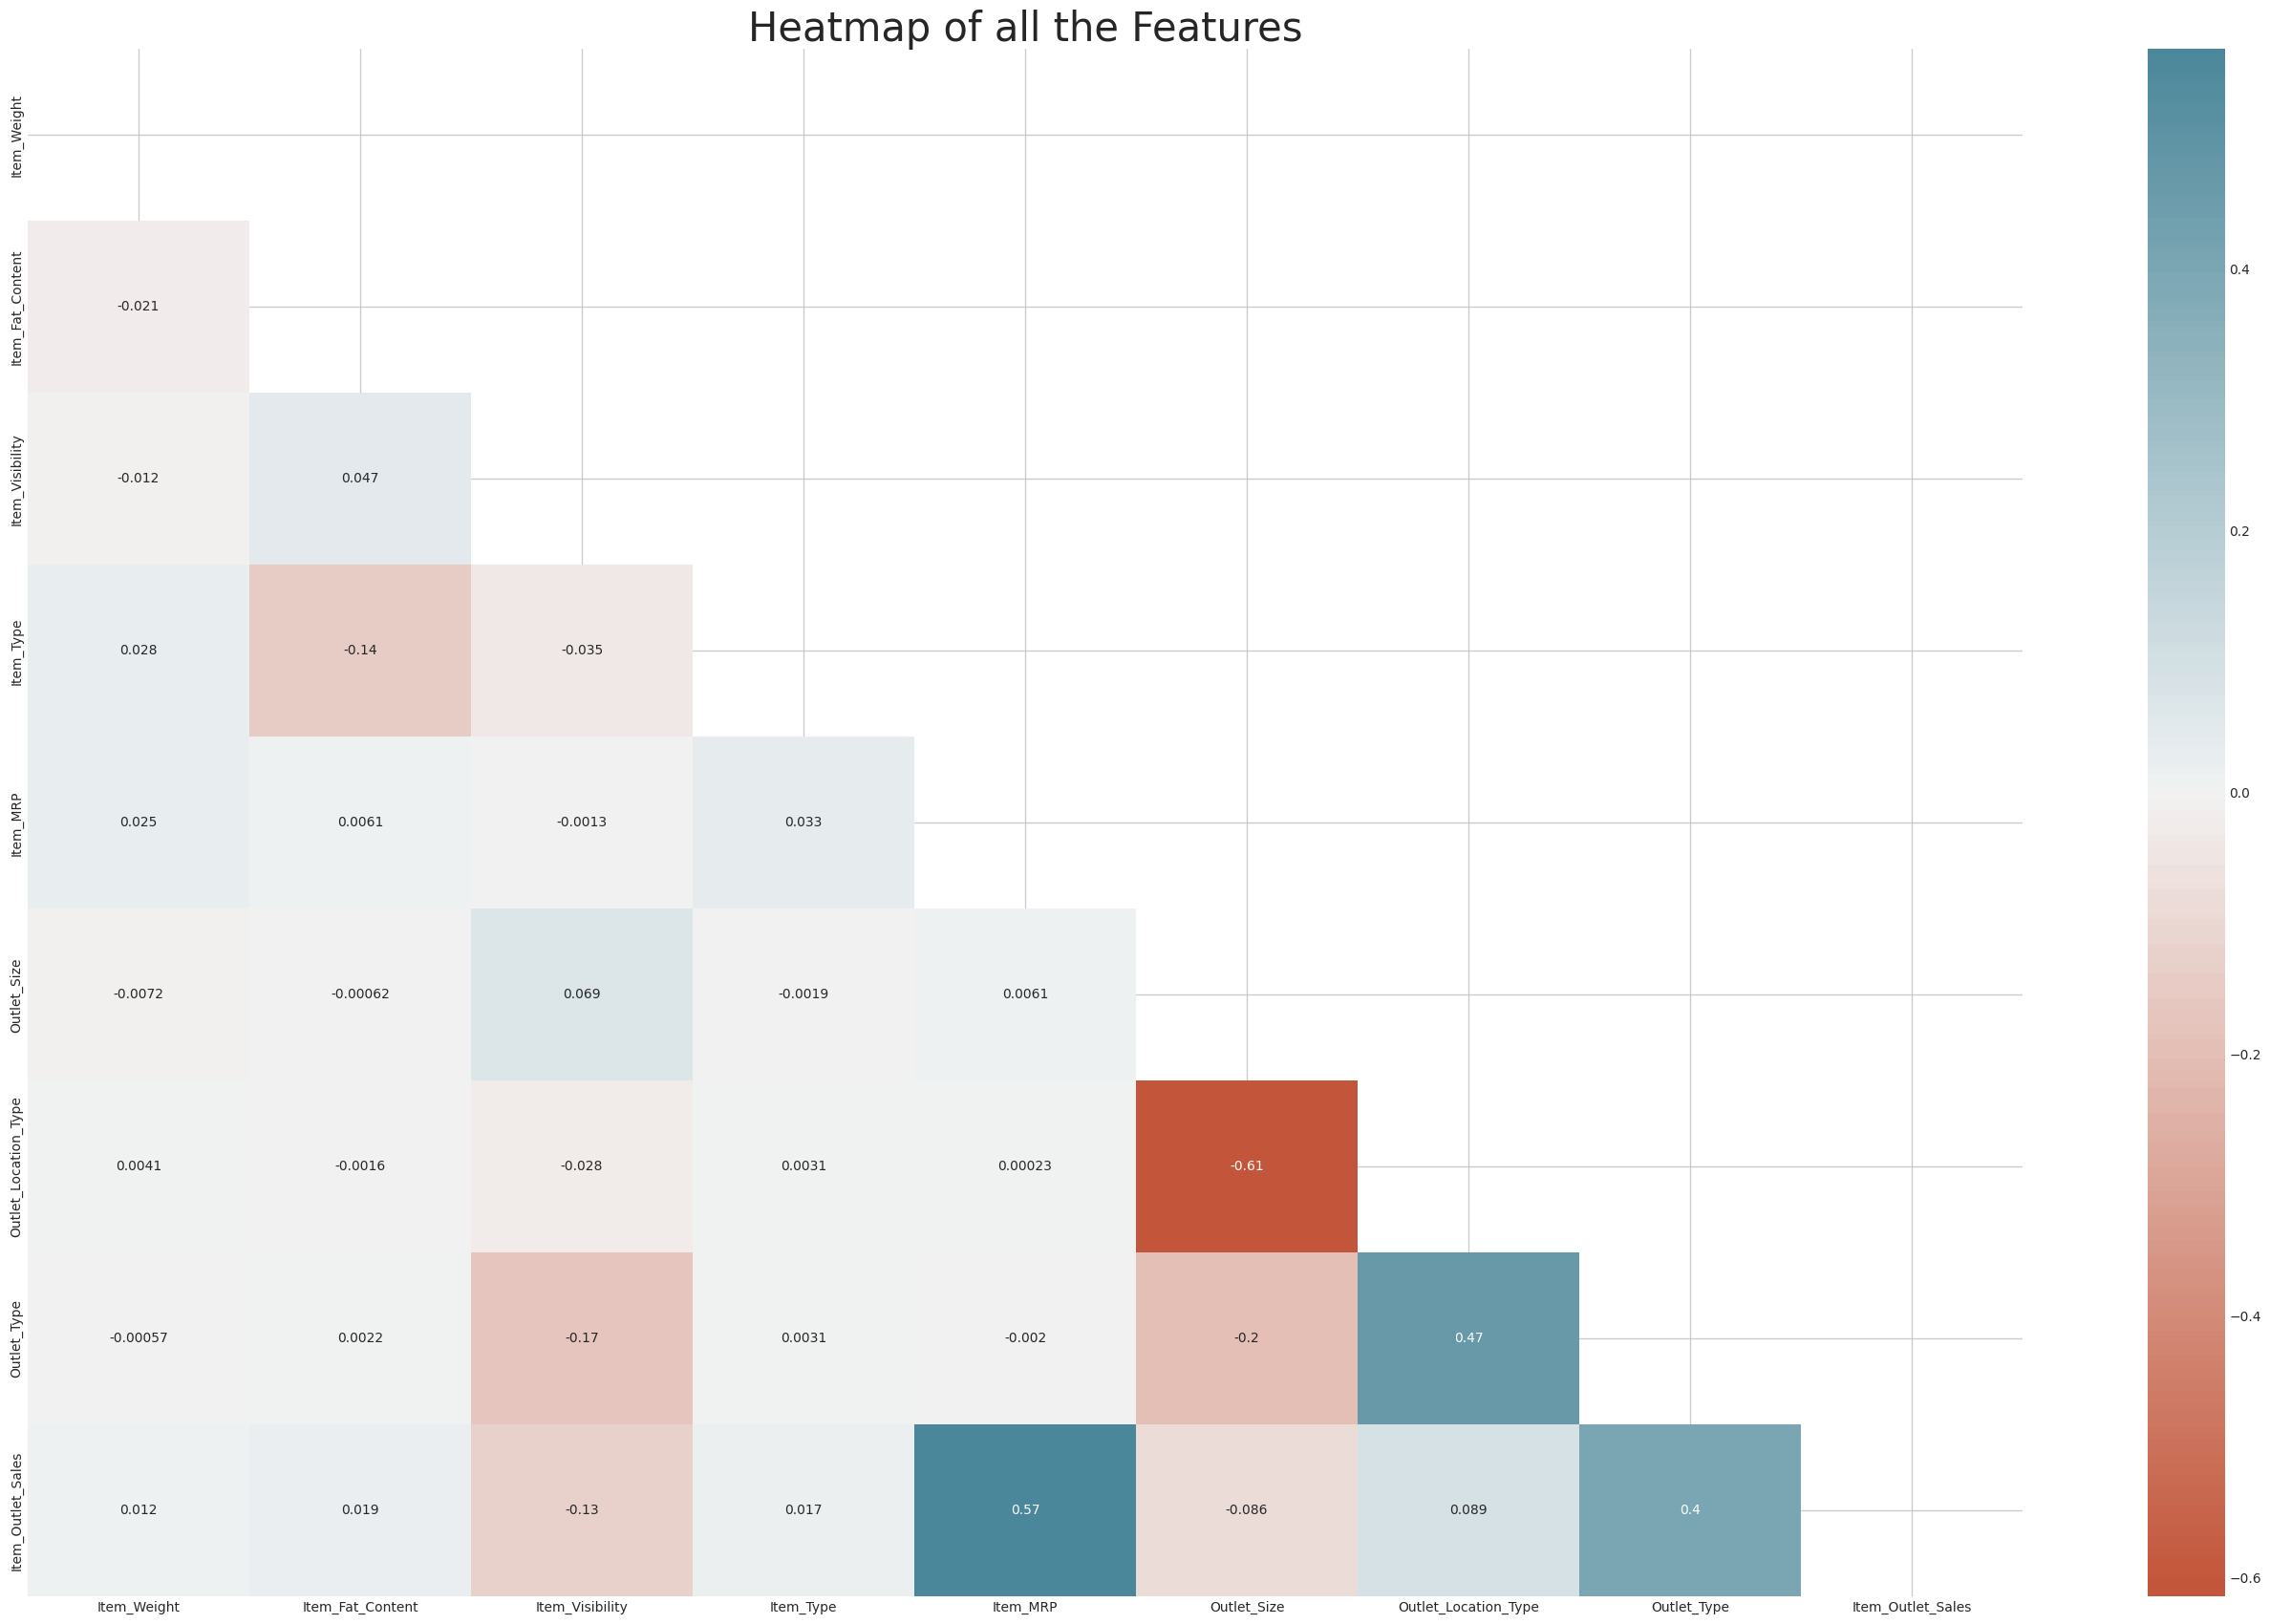

In [474]:
## Plot fig sizing.
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap.

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df.corr(),
            cmap=sns.diverging_palette(20, 220, n=200),
            mask = mask,
            annot=True,
            center = 0,
           );
## Give title.
plt.title("Heatmap of all the Features", fontsize = 30);

In [475]:
def customized_scatterplot(y, x):
        ## Sizing the plot.
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

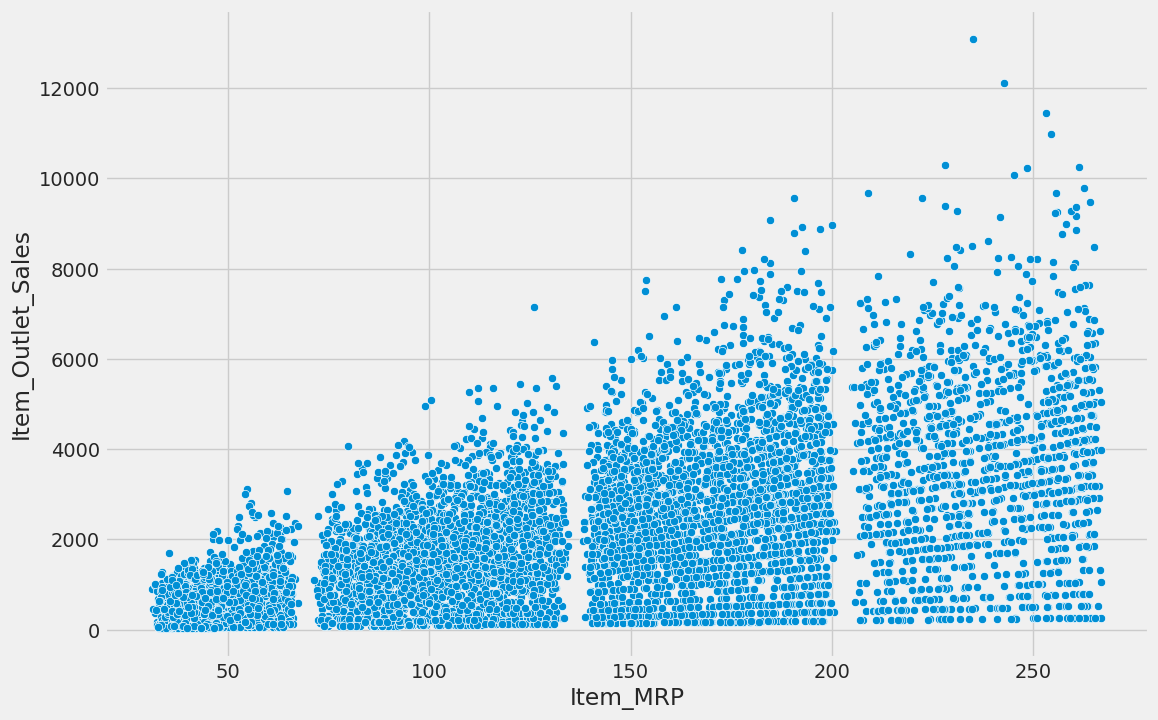

In [476]:
customized_scatterplot(df.Item_Outlet_Sales, df.Item_MRP)

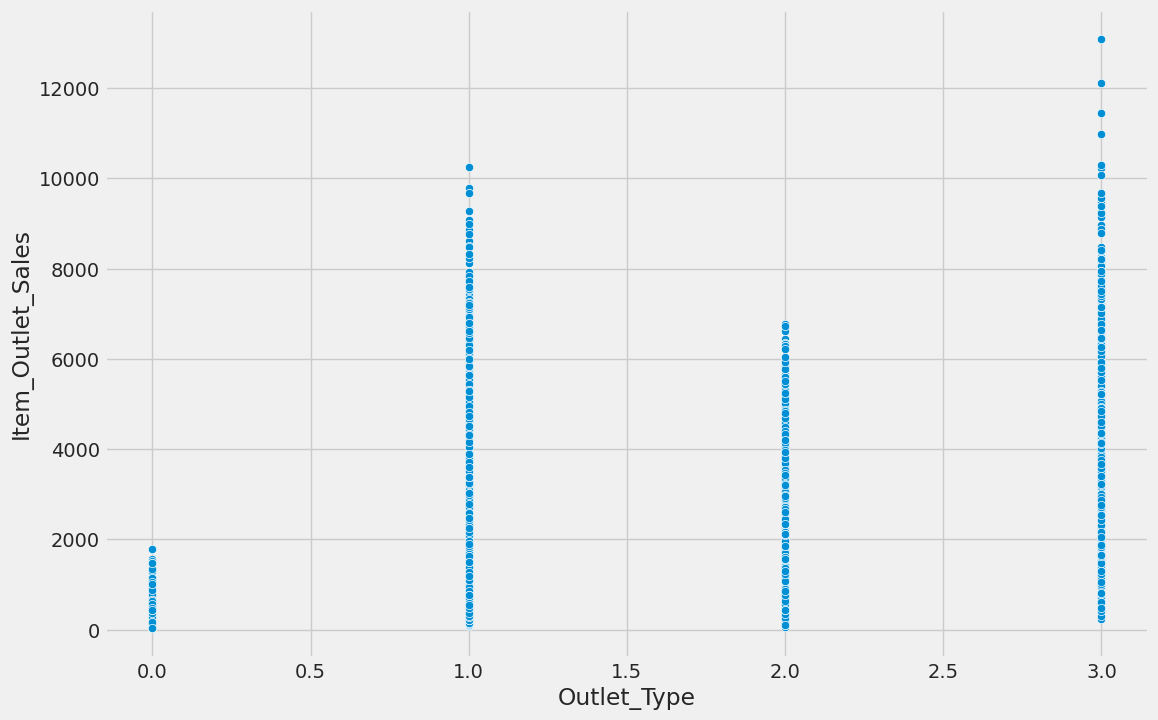

In [477]:
customized_scatterplot(df.Item_Outlet_Sales, df.Outlet_Type)

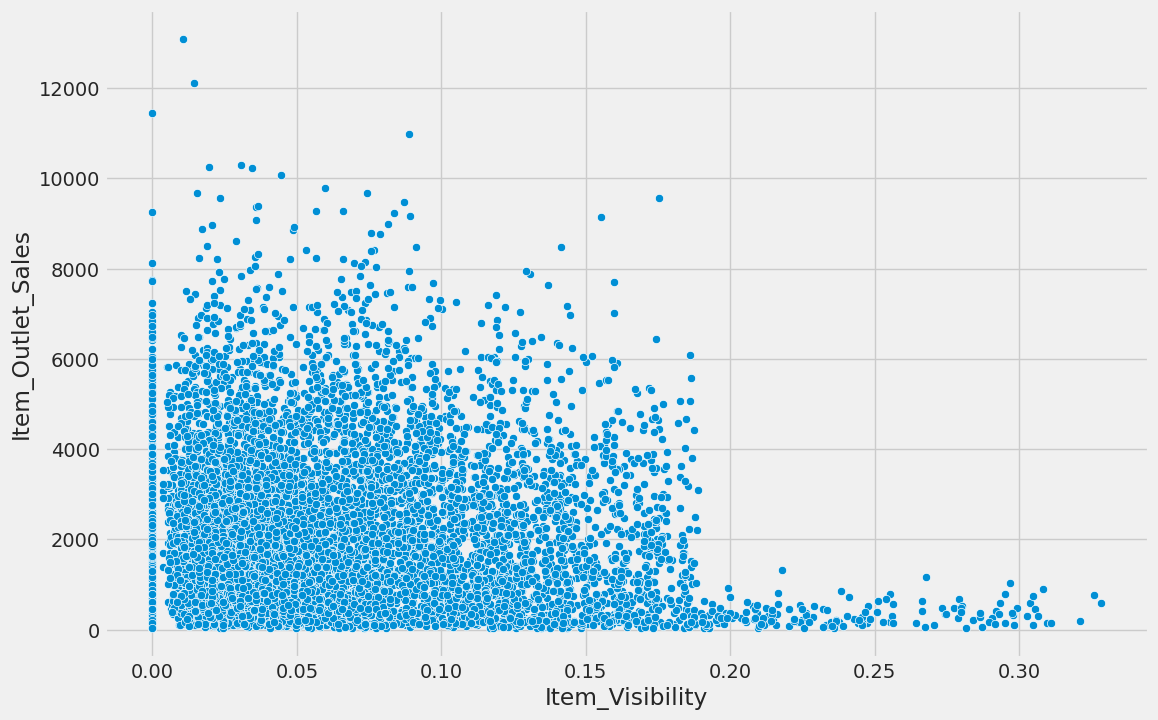

In [478]:
customized_scatterplot(df.Item_Outlet_Sales, df.Item_Visibility)

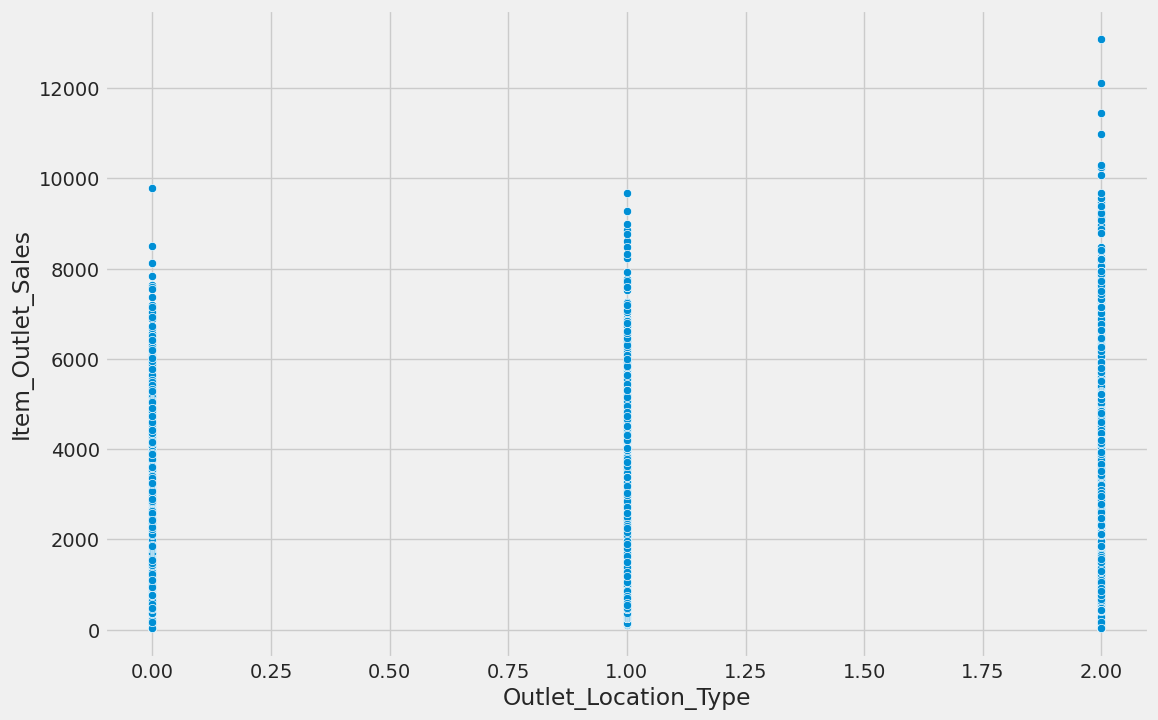

In [479]:
customized_scatterplot(df.Item_Outlet_Sales, df.Outlet_Location_Type)

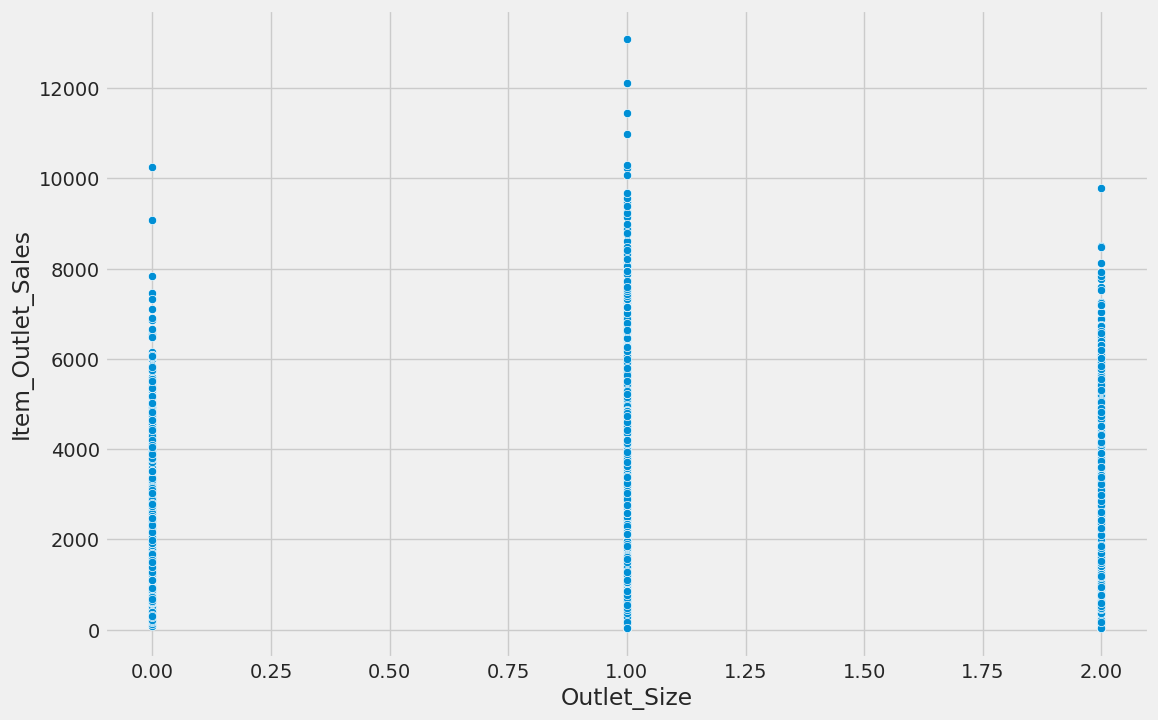

In [480]:
customized_scatterplot(df.Item_Outlet_Sales, df.Outlet_Size)

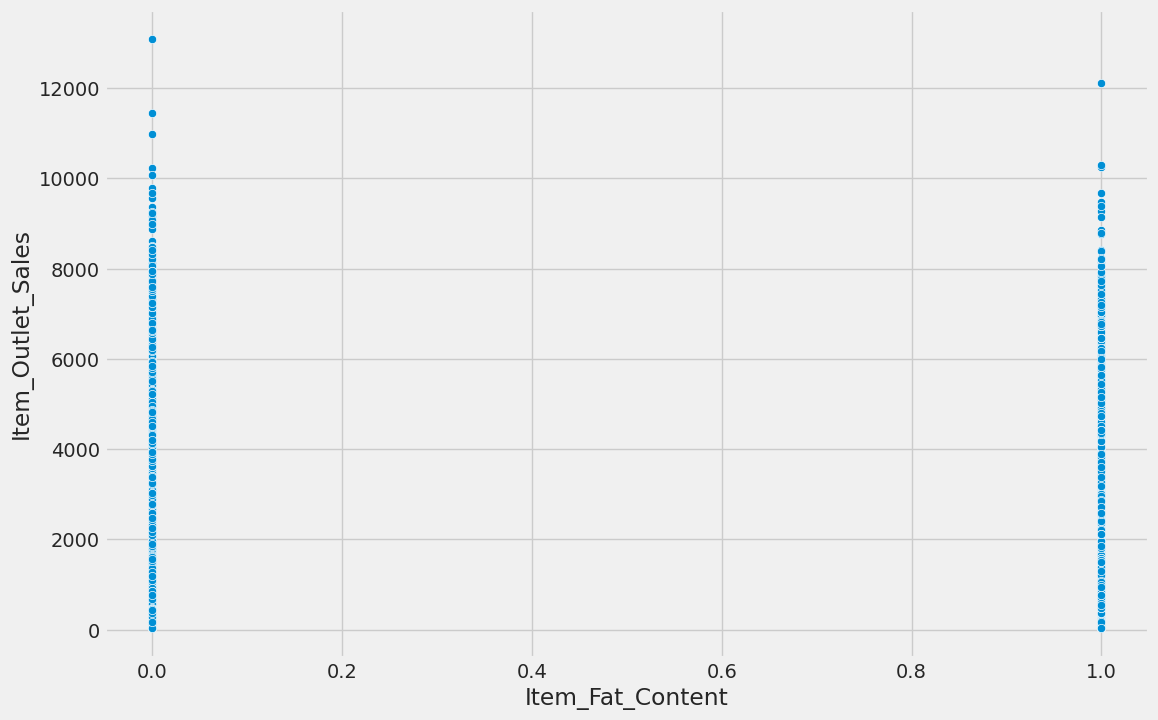

In [481]:
customized_scatterplot(df.Item_Outlet_Sales, df.Item_Fat_Content)

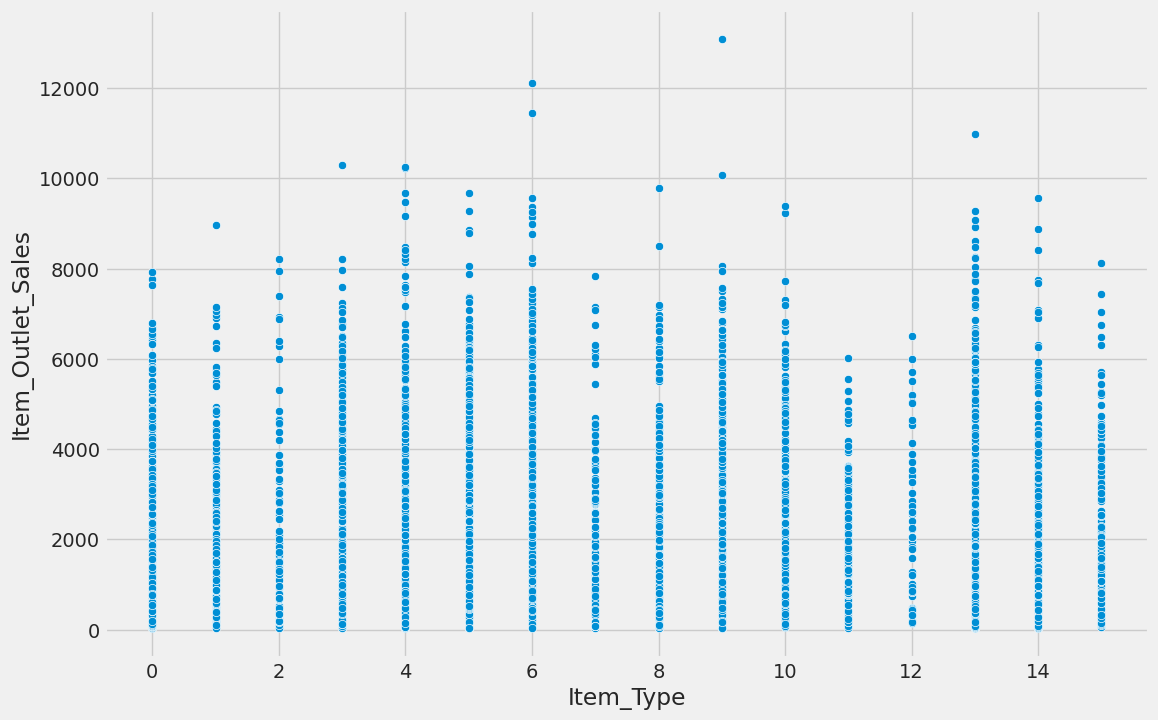

In [482]:
customized_scatterplot(df.Item_Outlet_Sales, df.Item_Type)

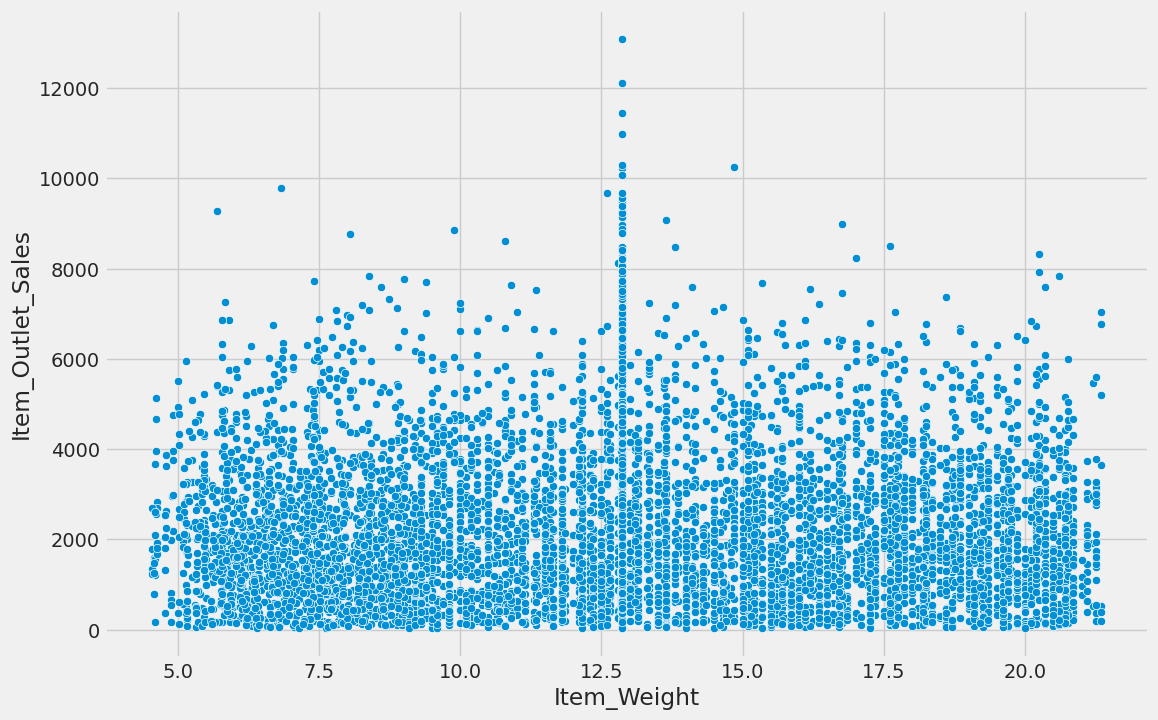

In [483]:
customized_scatterplot(df.Item_Outlet_Sales, df.Item_Weight)

## **Assumptions of Regression**

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

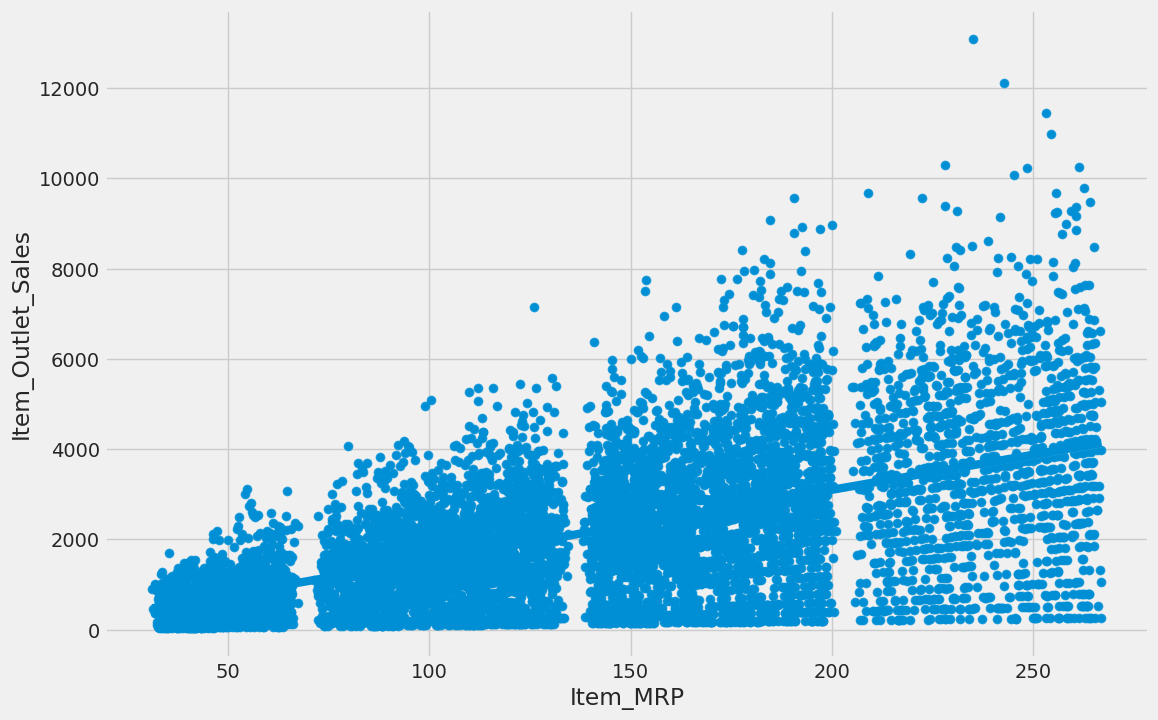

In [484]:
## Plot sizing.
fig, (ax1) = plt.subplots(figsize = (12,8),ncols=1, sharey=False)
## Scatter plotting for OutletSales and MRP.
sns.scatterplot(x = df.Item_MRP, y = df.Item_Outlet_Sales,  ax=ax1)
## Putting a regression line.
sns.regplot(x=df.Item_MRP, y=df.Item_Outlet_Sales, ax=ax1)


<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

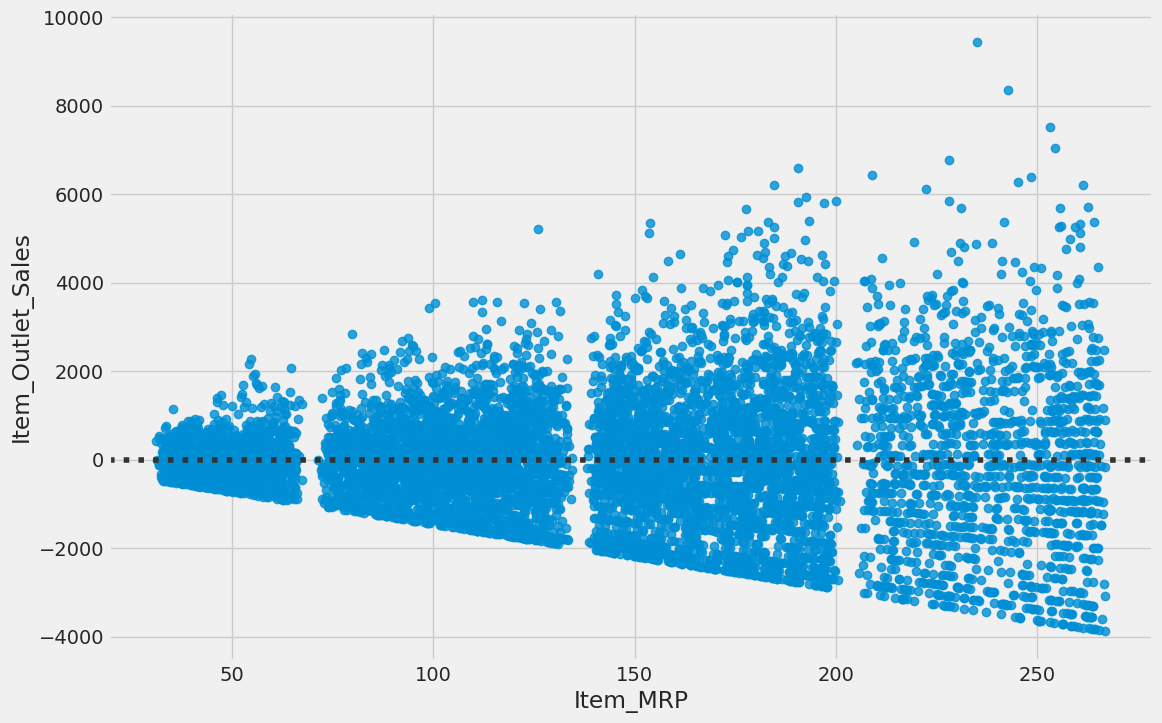

In [485]:
plt.subplots(figsize=(12,8))
sns.residplot(x=df.Item_MRP,y=df.Item_Outlet_Sales)

<ipython-input-471-cdbc4950f97b>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)


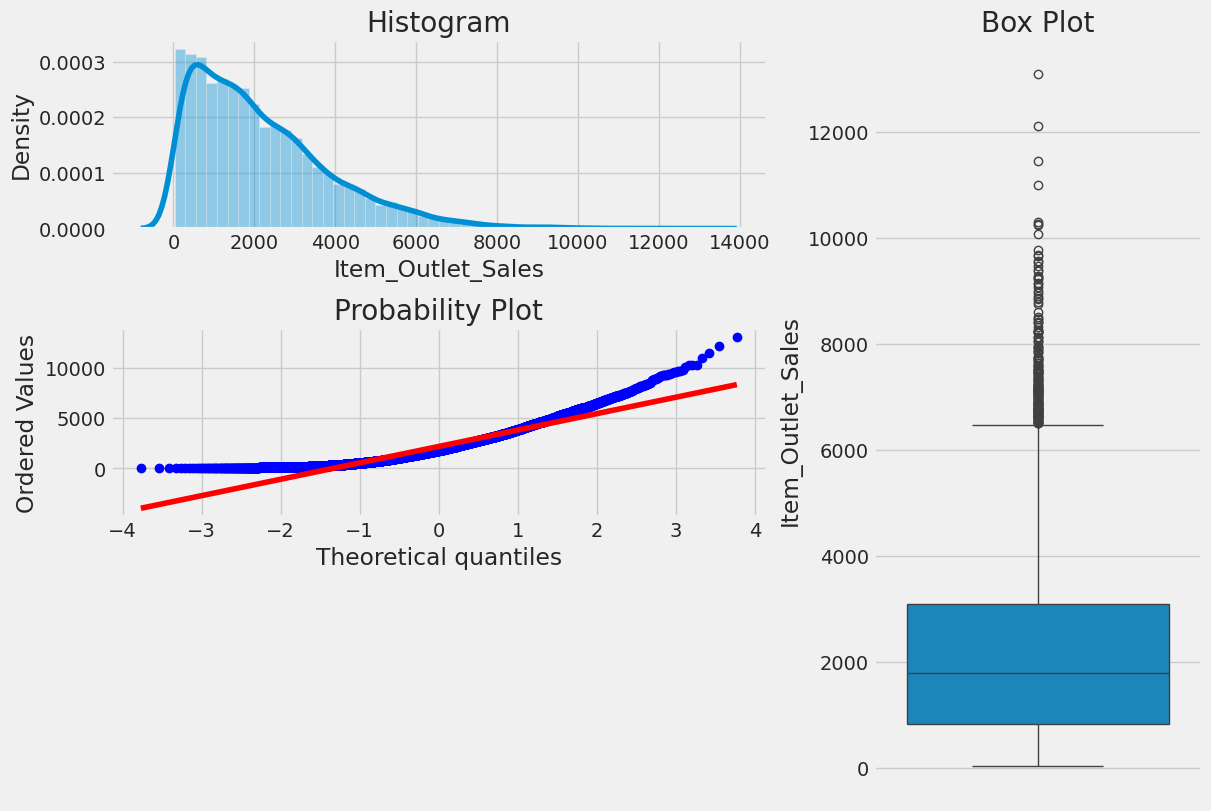

In [486]:
plotting_3_chart(df,"Item_Outlet_Sales")

<ipython-input-471-cdbc4950f97b>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)


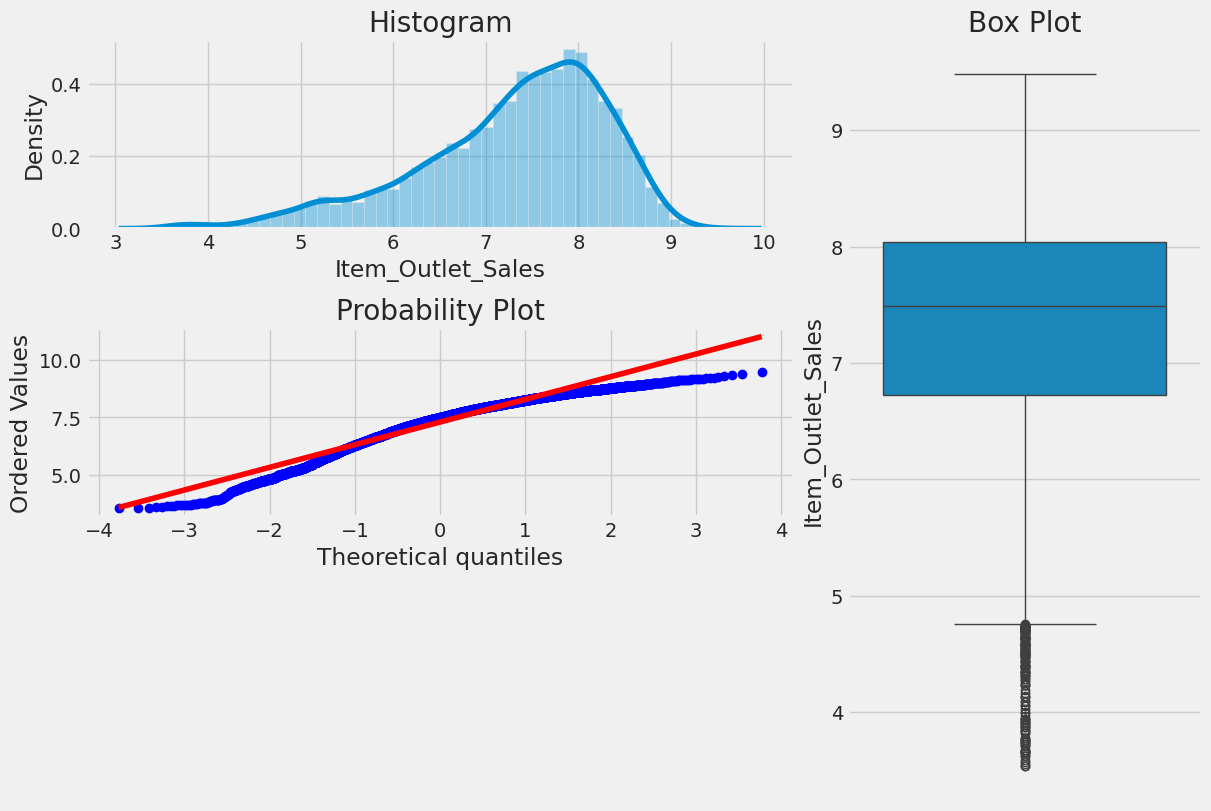

In [487]:
df["Item_Outlet_Sales"]=np.log1p(df["Item_Outlet_Sales"])
plotting_3_chart(df,"Item_Outlet_Sales")

<ipython-input-488-56e87bb02186>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


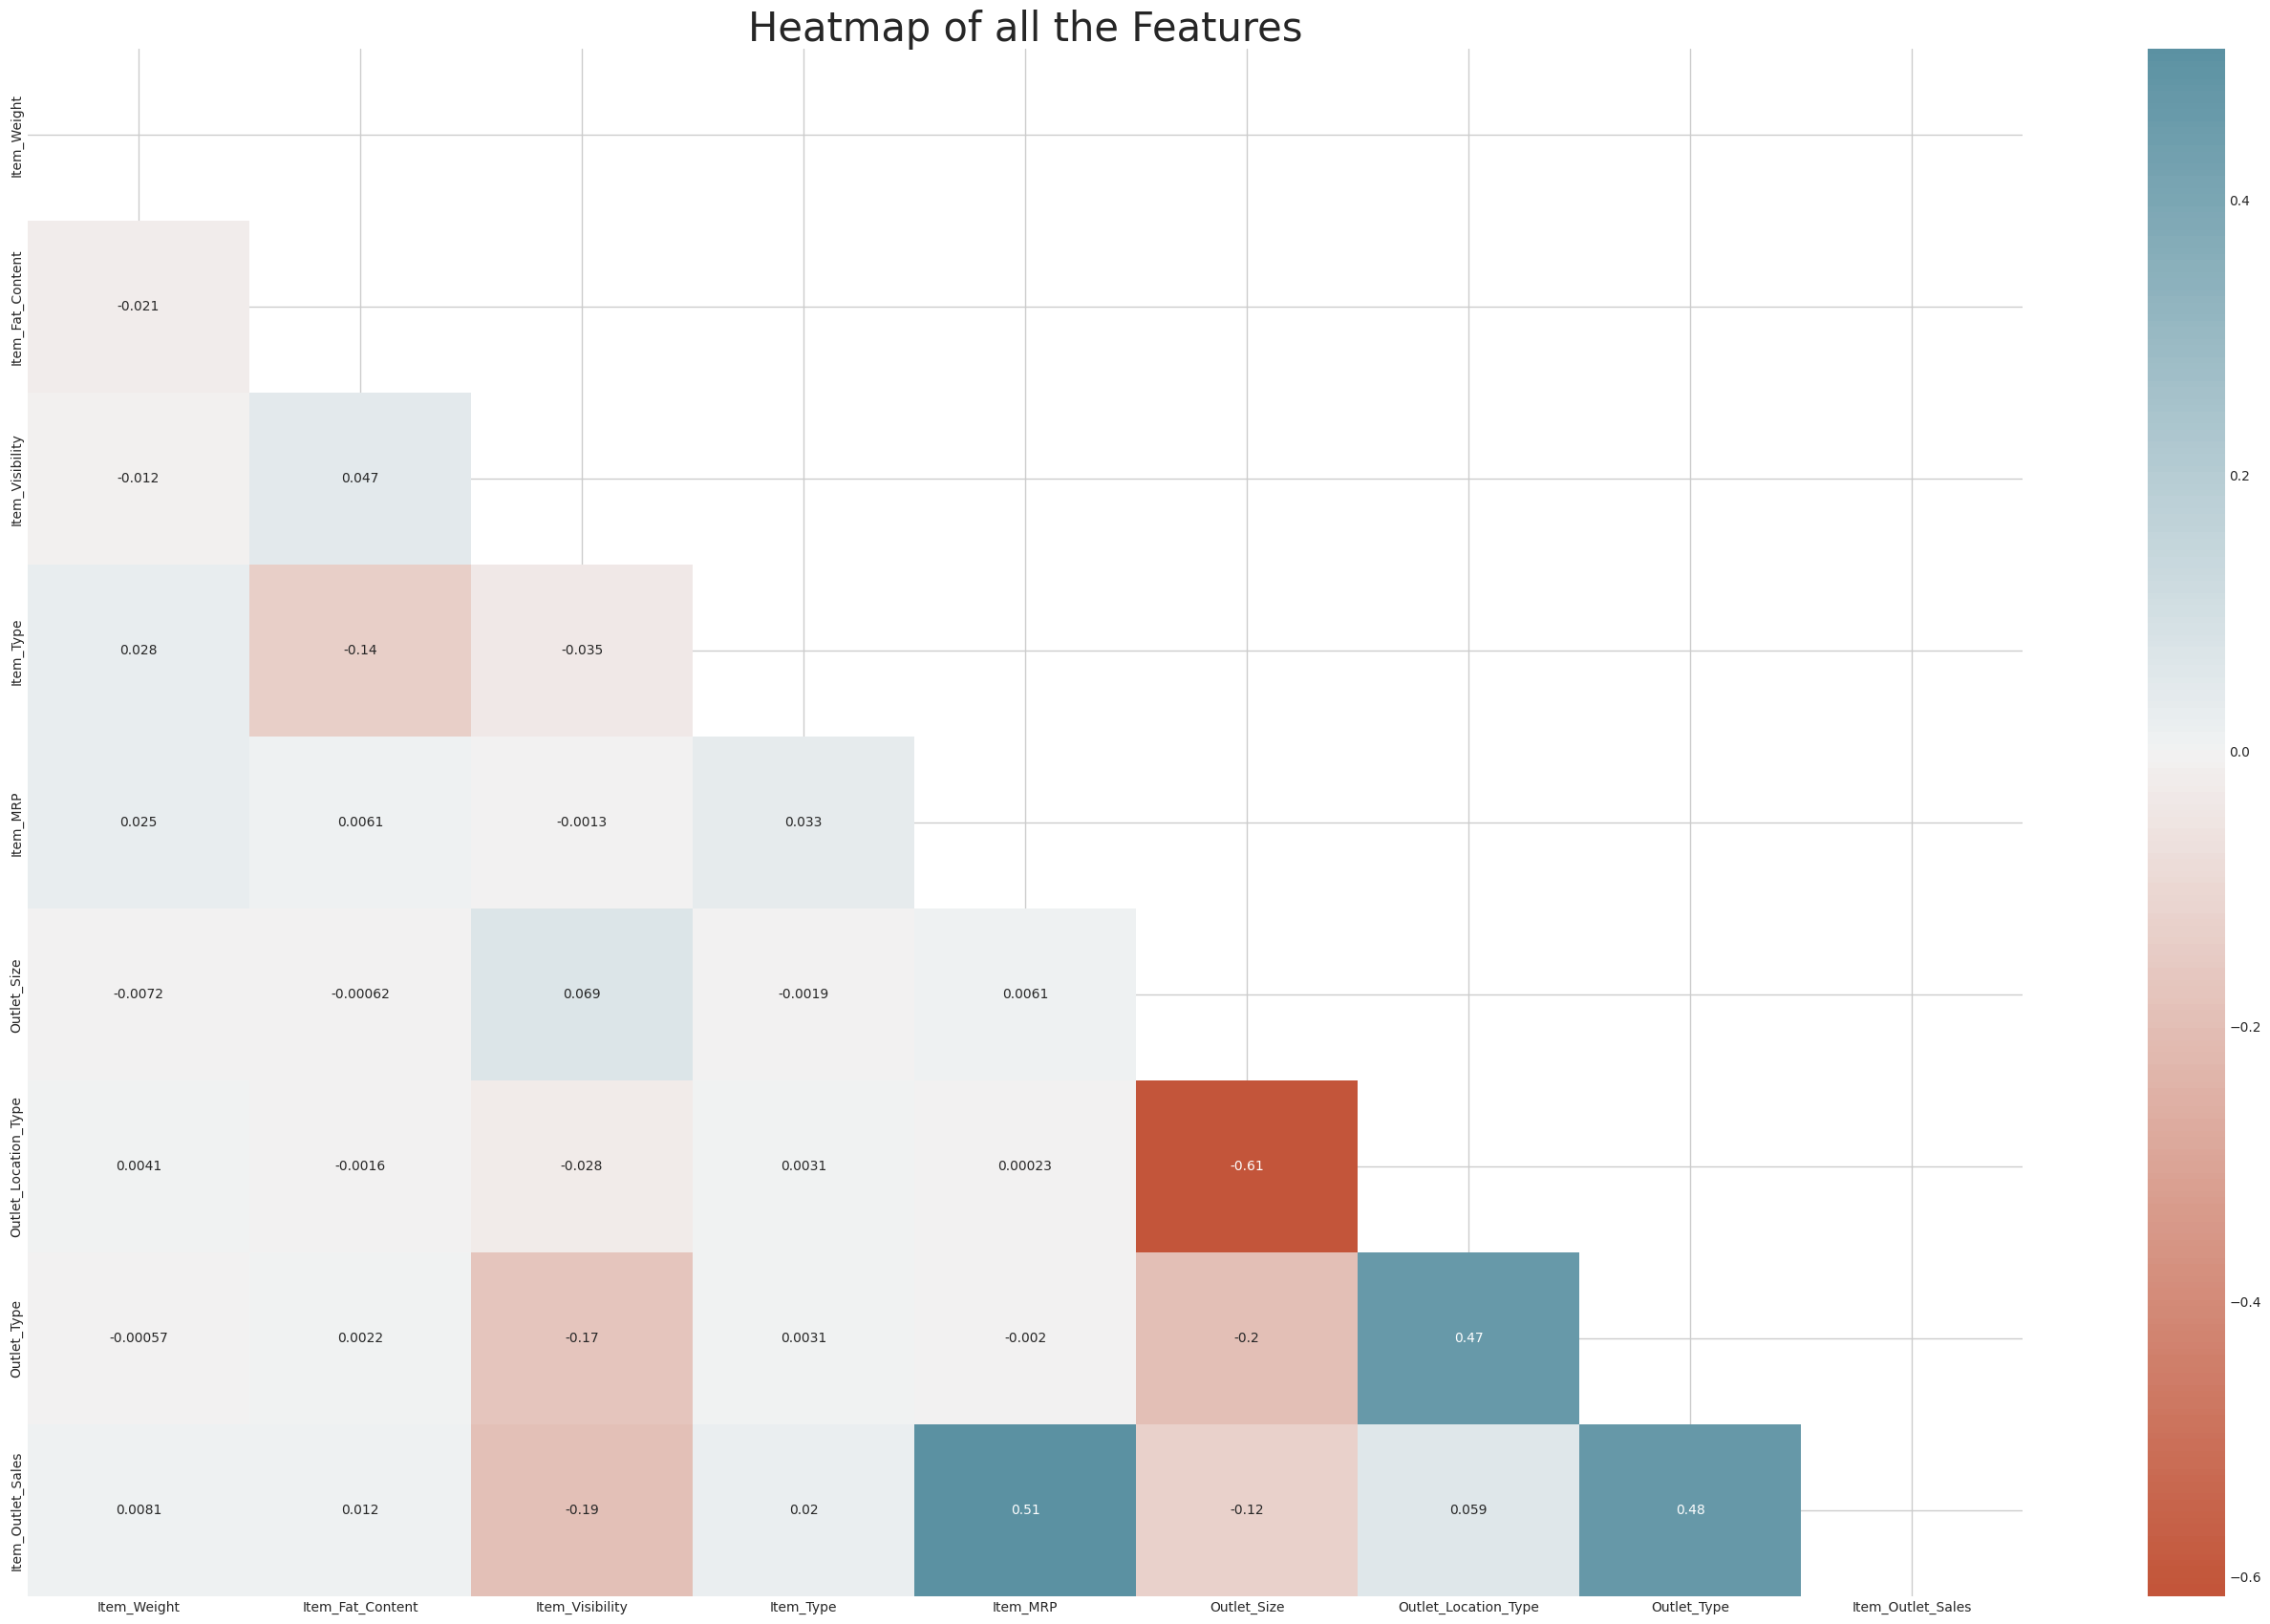

In [488]:
## Plot fig sizing.
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap.

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df.corr(),
            cmap=sns.diverging_palette(20, 220, n=200),
            mask = mask,
            annot=True,
            center = 0,
           );
## Give title.
plt.title("Heatmap of all the Features", fontsize = 30);

In [489]:

## Deleting those two values with outliers.
train = df[df.Item_MRP < 4500]
train.reset_index(drop = True, inplace = True)

## save a copy of this dataset so that any changes later on can be compared side by side.
previous_train = train.copy()

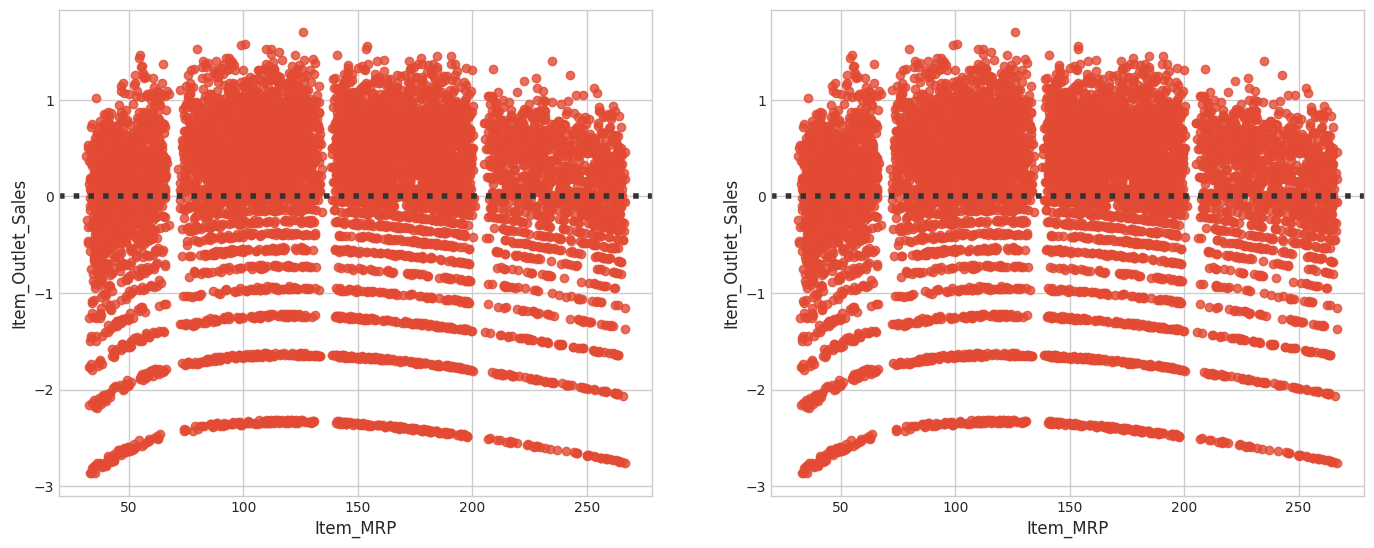

In [490]:
fig, (ax1, ax2) = plt.subplots(figsize = (15,6),
                               ncols=2,
                               sharey = False,
                               sharex=False
                              )
## doing the first scatter plot.
sns.residplot(x = previous_train.Item_MRP, y = previous_train.Item_Outlet_Sales, ax = ax1)
## doing the scatter plot for Item_MRP and Item_Outlet_Sales.
sns.residplot(x = df.Item_MRP, y = df.Item_Outlet_Sales, ax = ax2);

In [491]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df,df['Item_Outlet_Sales'],test_size =0.25, random_state = 0)

In [492]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6392, 9), (6392,), (2131, 9), (2131,))

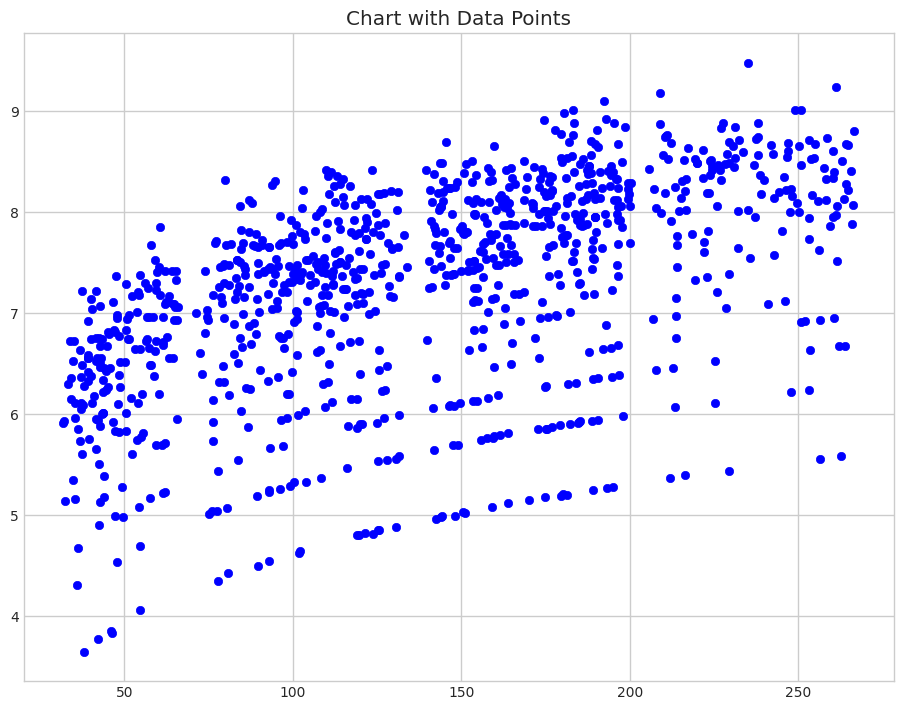

In [493]:
sample_train = df.sample(1000)
import seaborn as sns
plt.subplots(figsize = (10,8))
ax = plt.gca()
ax.scatter(sample_train.Item_MRP.values, sample_train.Item_Outlet_Sales.values, color ='b');
plt.title("Chart with Data Points");

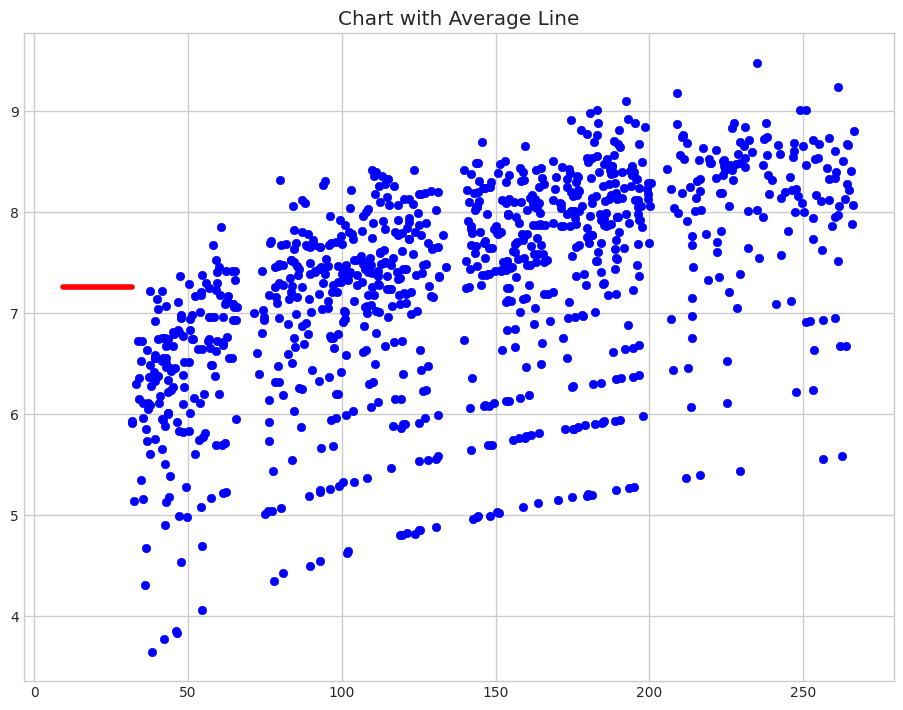

In [494]:
plt.subplots(figsize = (10,8))
ax = plt.gca()
ax.scatter(sample_train.Item_MRP.values, sample_train.Item_Outlet_Sales.values, color ='b');
ax.plot((sample_train.Item_MRP.values.min(),sample_train.Item_Outlet_Sales.values.max()), (sample_train.Item_Outlet_Sales.values.mean(),sample_train.Item_Outlet_Sales.values.mean()), color = 'r');
plt.title("Chart with Average Line");

In [495]:
## Calculating Mean Squared Error(MSE)
sample_train['mean_Item_Outlet_Sales'] = sample_train.Item_Outlet_Sales.mean()
sample_train['mse'] = np.square(sample_train.mean_Item_Outlet_Sales - sample_train.Item_Outlet_Sales)
sample_train.mse.mean()
## getting mse
print("Mean Squared Error(MSE) for average line is : {}".format(sample_train.mse.mean()))

Mean Squared Error(MSE) for average line is : 1.0550026287600607


In [496]:
## Calculating the beta coefficients by hand.
## mean of y.
y_bar = sample_train.Item_Outlet_Sales.mean()
## mean of x.
x_bar = sample_train.Item_MRP.mean() ## Calculating the beta coefficients by hand.
## mean of y.
y_bar = sample_train.Item_Outlet_Sales.mean()
## mean of x.
x_bar = sample_train.Item_MRP.mean()
## Std of y
std_y = sample_train.Item_Outlet_Sales.std()
## std of x
std_x = sample_train.Item_MRP.std()
## correlation of x and y
r_xy = sample_train.corr().loc['Item_MRP','Item_Outlet_Sales']
## finding beta_1
beta_1 = r_xy*(std_y/std_x)
## finding beta_0
beta_0 = y_bar - beta_1*x_bar.mean()
## Std of y
std_y = sample_train.Item_Outlet_Sales.std()
## std of x
std_x = sample_train.Item_MRP.std()
## correlation of x and y
r_xy = sample_train.corr().loc['Item_MRP','Item_Outlet_Sales']
## finding beta_1
beta_1 = r_xy*(std_y/std_x)
## finding beta_0
beta_0 = y_bar - beta_1*x_bar

In [497]:
## getting y_hat, which is the predicted y values.
sample_train['Linear_Yhat'] = beta_0 + beta_1*sample_train['Item_MRP']

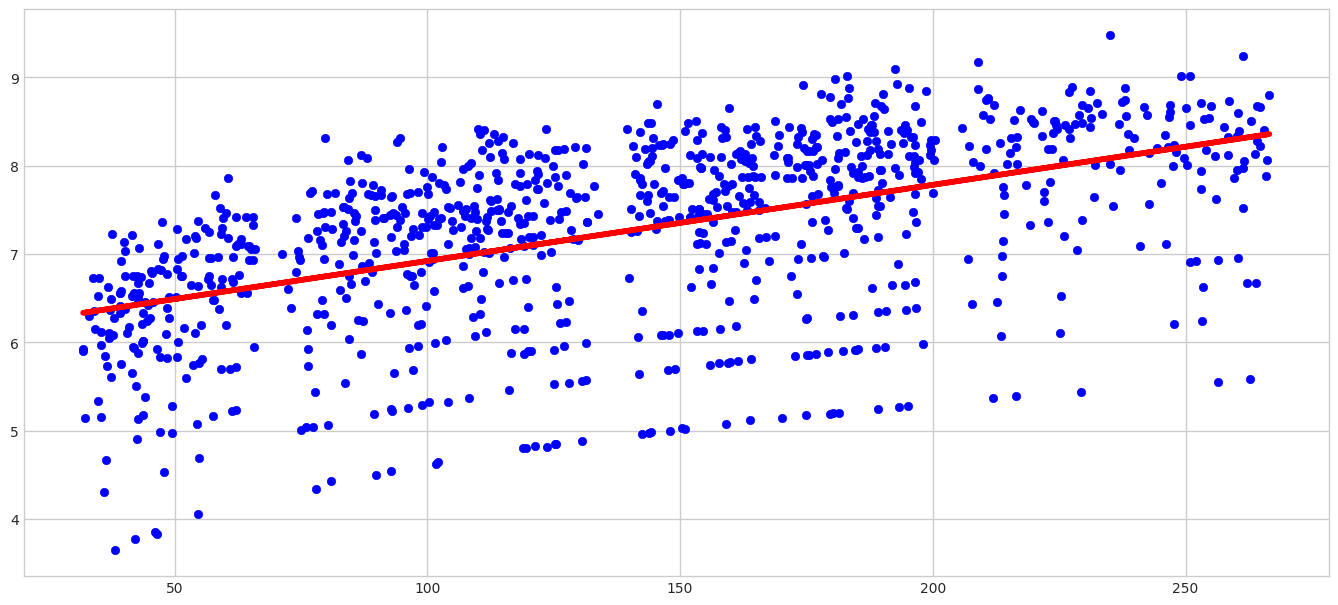

In [498]:
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(sample_train.Item_MRP, sample_train.Item_Outlet_Sales, c='b')
ax.plot(sample_train['Item_MRP'], sample_train['Linear_Yhat'], color='r');

In [499]:
print("Mean Squared Error(MSE) for regression line is : {}".format(np.square(sample_train['Item_Outlet_Sales'] - sample_train['Linear_Yhat']).mean()))

Mean Squared Error(MSE) for regression line is : 0.7707252024820131


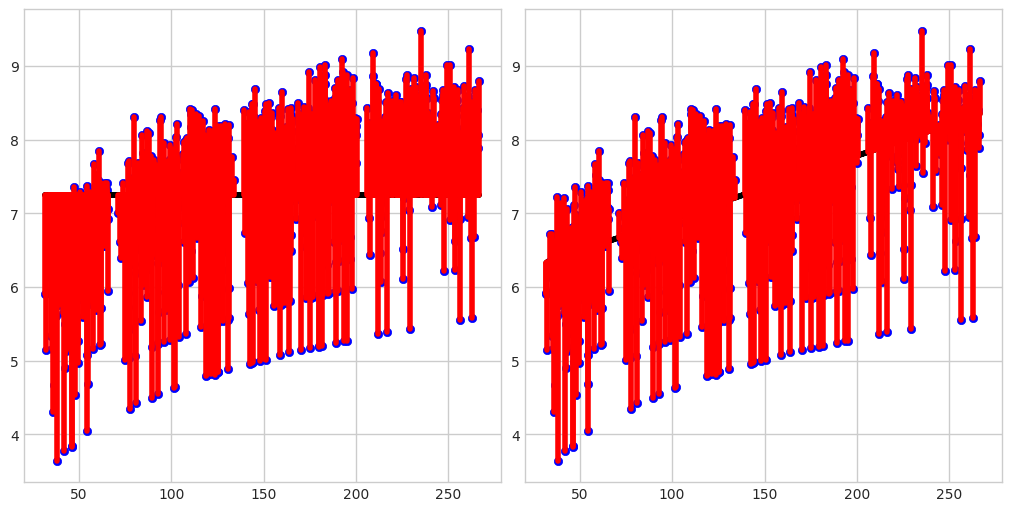

In [500]:
## Creating a customized chart. and giving in figsize and everything.
fig = plt.figure(constrained_layout=True, figsize=(10,5))
## creating a grid of 3 cols and 3 rows.
grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
#gs = fig3.add_gridspec(3, 3)
#ax1 = fig.add_subplot(grid[row, column])
ax1 = fig.add_subplot(grid[0, :1])

# get the axis
ax1 = fig.gca()

# plot it
ax1.scatter(x=sample_train['Item_MRP'], y=sample_train['Item_Outlet_Sales'], c='b')
ax1.plot(sample_train['Item_MRP'], sample_train['mean_Item_Outlet_Sales'], color='k');

# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['Item_MRP'], row['Item_MRP']), (row['Item_Outlet_Sales'], row['mean_Item_Outlet_Sales']), 'r-')

ax2 = fig.add_subplot(grid[0, 1:])

# plot it
ax2.scatter(x=sample_train['Item_MRP'], y=sample_train['Item_Outlet_Sales'], c='b')
ax2.plot(sample_train['Item_MRP'], sample_train['Linear_Yhat'], color='k');
# iterate over predictions
for _, row in sample_train.iterrows():
    plt.plot((row['Item_MRP'], row['Item_MRP']), (row['Item_Outlet_Sales'], row['Linear_Yhat']), 'r-')

In [502]:
## importing necessary models.
## Splitting Train and Test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, df['Item_Outlet_Sales'], test_size=0.25, random_state=0)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Call in the LinearRegression object
lin_reg = LinearRegression()
## fit train and test data.
lin_reg.fit(x_train, y_train)
## Predict test data.
y_pred = lin_reg.predict(x_test)

## **Decision Tree**

In [515]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

## transform the train and test datasets
Scaler=StandardScaler()
x_test_scaled=Scaler.fit_transform(x_test.values.reshape(-1, 1))

Scaler=StandardScaler()
Scaler.fit(x_train)
x_train_scaled=Scaler.fit_transform(x_train)
x_test_scaled=Scaler.fit_transform(x_test.values.reshape(-1, 1))

model = DecisionTreeRegressor(random_state=2)
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.9999904681923056
RMSE: 0.0031723752678572007
